# Results Gathering

## Python Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

## Load Data

In [2]:
task = "brock"
algorithms = ["NaSATD3", "SACAE"]

runs = []
run_algs = []
mode = 0

for algorithm in algorithms:
    print(f"All runs of {algorithm} on {task}:")
    dir = f"/home/pokemon/cares_rl_logs/pokemon/{task}/{algorithm}"
    for d in os.listdir(dir):
        path = f"{dir}/{d}"
        if os.path.isdir(path):
            runs.append(path)
            run_algs.append(algorithm)
            print(f"{mode}. {d}")
            mode += 1

All runs of NaSATD3 on brock:
0. 24_10_23_16-42-46
All runs of SACAE on brock:
1. 24_10_23_16-47-28
2. 24_10_24_18-35-06


In [11]:
# Enter indices of runs of interest
selection = [0, 1]

num_runs = len(selection)

data = [[[],[], ""] for i in range(num_runs)]

# train_csvs = [[]] * num_runs
# eval_csvs = [[]] * num_runs

for mode, run_index in enumerate(selection):
    data[mode][0] = pd.read_csv(f"{runs[run_index]}/data/train.csv")
    data[mode][1] = pd.read_csv(f"{runs[run_index]}/data/eval.csv")
    data[mode][2] = run_algs[run_index]
    print(mode, data[mode][2])
    # train_csvs[i] = pd.read_csv(f"{runs[selected_run]}/data/train.csv")
    # eval_csvs[i] = pd.read_csv(f"{runs[selected_run]}/data/eval.csv")
    # train_csvs[i]["average_episode_reward"] = train_csvs[i]["episode_reward"].rolling(window=20).mean()

0 NaSATD3
1 SACAE


## Graph Data

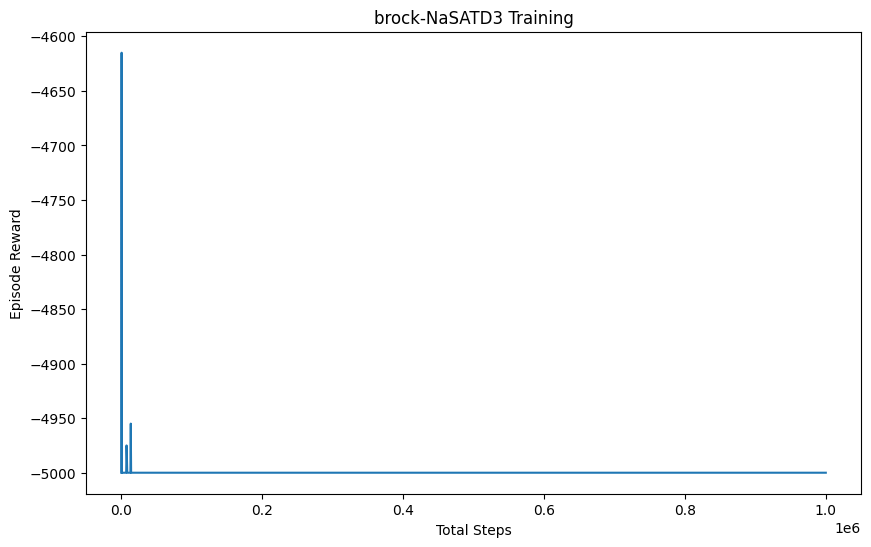

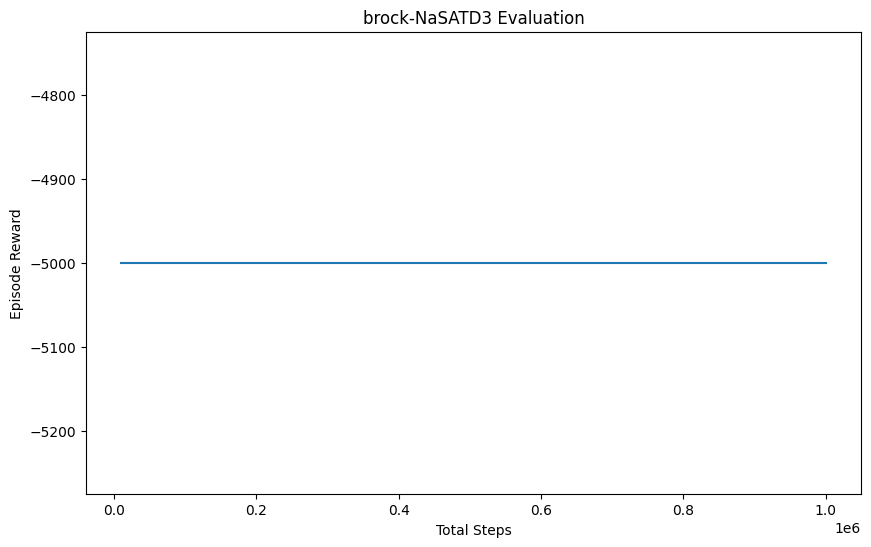

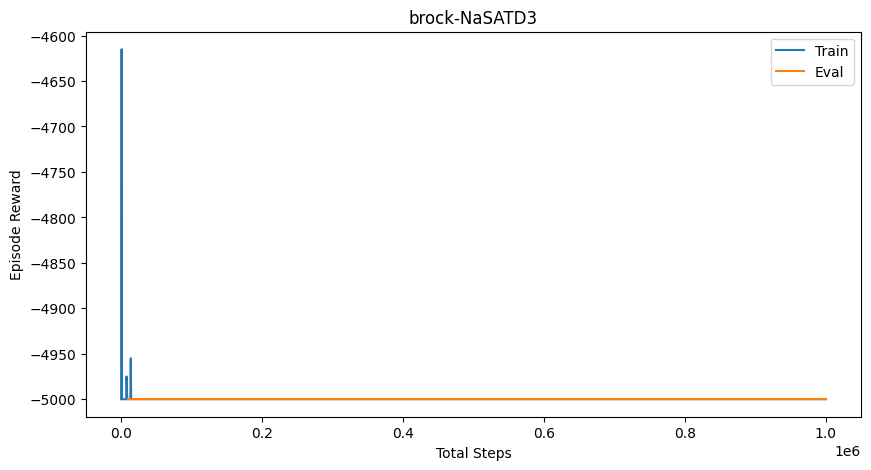

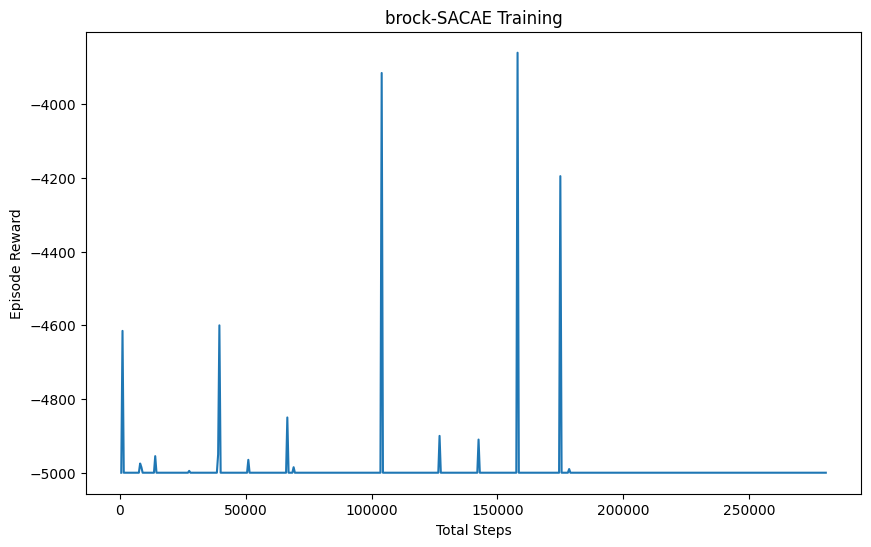

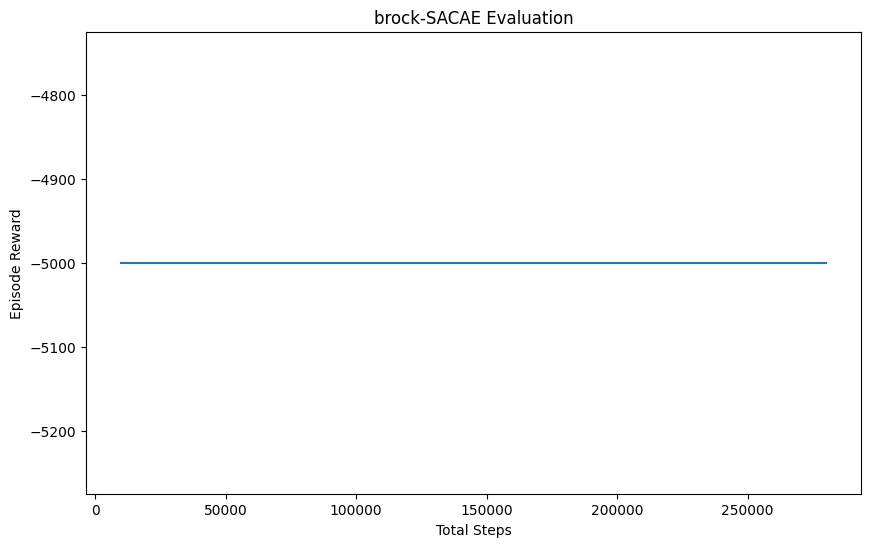

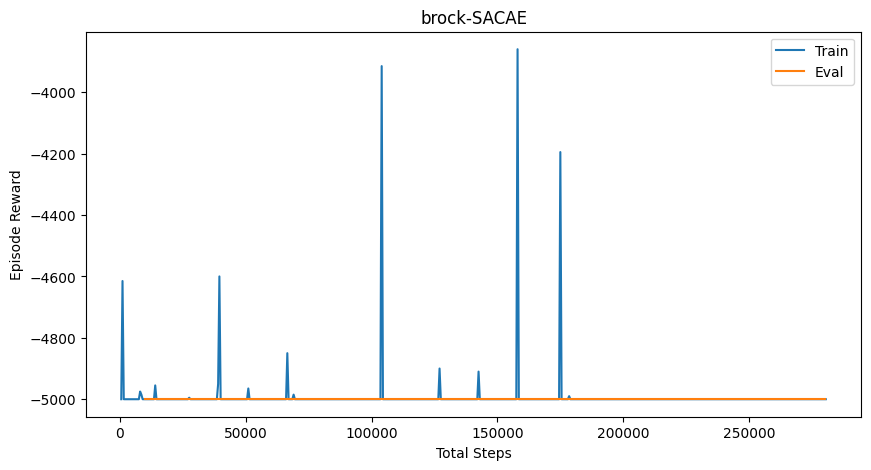

In [25]:
def plot_single_runs(data):
    for run in data:
        plot_run(run)

def plot_run(run):
    algorithm = run[2]
    plot_single_mode(run[0], algorithm, "Training")
    plot_single_mode(run[1], algorithm, "Evaluation")
    plot_both_modes(run)

def plot_single_mode(df, algorithm, mode):
    plt.figure(figsize=(10,6))
    plt.title(f"{task}-{algorithm} {mode}")
    plt.plot(df["total_steps"], df["episode_reward"])
    plt.xlabel("Total Steps")
    plt.ylabel("Episode Reward")
    plt.show()

def plot_both_modes(run):
    labels = ["Train", "Eval"]
    plt.figure(figsize=(8,6))
    plt.title(f"{task}-{run[2]}")
    for i in range(2):
        plt.plot(run[i]["total_steps"], run[i]["episode_reward"], label=labels[i])
    plt.xlabel("Total Steps")
    plt.ylabel("Episode Reward")
    plt.legend()
    plt.show()

plot_single_runs(data)



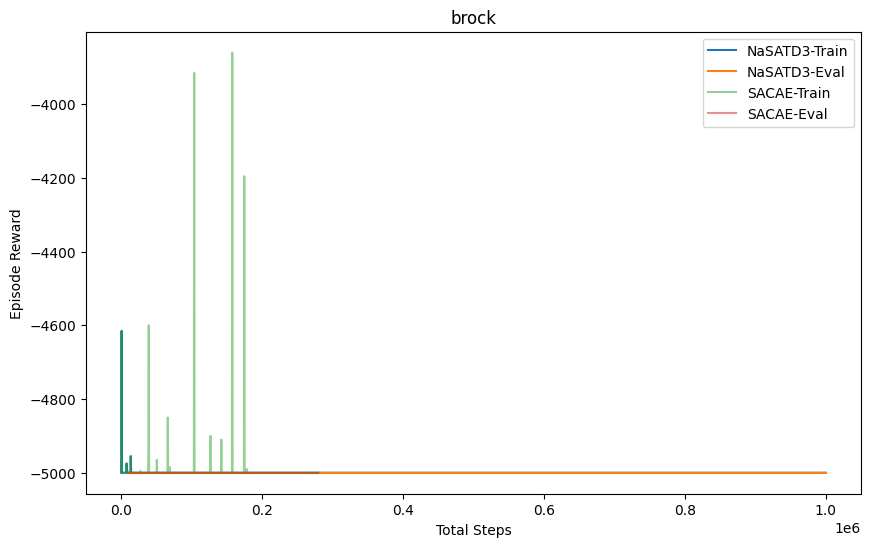

In [24]:
def plot_multi_runs(runs):
    labels = ["Train", "Eval"]
    plt.figure(figsize=(10,6))
    plt.title(f"{task}")
    for i, run in enumerate(runs):
        for mode in range(2):
            plt.plot(run[mode]["total_steps"], run[mode]["episode_reward"], label=f"{run[2]}-{labels[mode]}", alpha=1-0.5*i)
    plt.xlabel("Total Steps")
    plt.ylabel("Episode Reward")
    plt.legend()
    plt.show()

plot_multi_runs(data)